In [1]:
import pandas as pd 

In [2]:
pre_course = pd.read_csv("pre_course.csv")
post_course = pd.read_csv("post_course.csv")

In [3]:
pre_course_q3 = pre_course.filter(regex = "Q3")
pre_course.head()

,Unnamed: 0,Student Number,Start Time,Submit Time,Status,Q1,Q2,Q2.1,Q2.2,Q2.3,...,Q4.5,Q4.6,Q4.7,Q4.8,Q4.9,Q4.10,Q4.11,Q5,Q6,Q7
0,0,1,2022-08-09 19:46:53.200,2022-08-09 19:48:06.710,Submitted,Yes,No answer,in Chemistry teaching labs,No answer,No answer,...,True but I am not sure,I have no idea,I have no idea,False but I am not sure,False but I am not sure,I have no idea,I have no idea,Difference in potential,Difference in voltagw,Nil
1,1,2,2022-08-09 10:40:39.280,2022-08-09 10:46:53.903,Submitted,Yes,"Pre-University (e.g. Junior College, Polytechn...",in Chemistry teaching labs,No answer,Others,...,"False, I am confident",True but I am not sure,True but I am not sure,"False, I am confident","False, I am confident",False but I am not sure,"False, I am confident",Used to measure concentration by measuring the...,Used to measure concentration by applying curr...,I'm interested to learn more!
2,2,3,2022-08-10 02:37:50.900,2022-08-11 10:07:25.657,Submitted,Yes,"Pre-University (e.g. Junior College, Polytechn...",No answer,No answer,No answer,...,False but I am not sure,False but I am not sure,False but I am not sure,False but I am not sure,False but I am not sure,False but I am not sure,True but I am not sure,Potential measured can be used to find concent...,Currents can be measured by applying a fixed p...,I have not touched electrochemistry for about ...
3,4,5,2022-08-09 11:57:08.667,2022-08-09 12:06:04.880,Submitted,Yes,No answer,in Chemistry teaching labs,in other University modules,No answer,...,True but I am not sure,True but I am not sure,False but I am not sure,False but I am not sure,True but I am not sure,"True, I am confident",False but I am not sure,Potentiometry is an electroanalytic method whe...,Voltammetry is an electroanalytic method where...,NIL
4,5,6,2022-08-09 06:48:31.240,2022-08-09 07:09:04.273,Submitted,Yes,"Pre-University (e.g. Junior College, Polytechn...",No answer,in other University modules,No answer,...,"True, I am confident","False, I am confident","False, I am confident","False, I am confident","False, I am confident","False, I am confident","False, I am confident",The chemical analysis technique is used to obt...,Electrochemical analysis technique where a ran...,Electrochemistry


In [4]:
post_course_q3 = post_course.filter(regex = "Q3")
post_course.head()

,Unnamed: 0,Student Number,Start Time,Submit Time,Status,Q1,Q2,Q2.1,Q2.2,Q2.3,...,Q4.10,Q5,Q6,Q7.1,Q7.2,Q7.3,Q7.4,Q7.5,Q8,Q9
0,0,1,2022-09-21 10:47:33.463,2022-09-21 10:49:18.587,Submitted,Yes,"Pre-University (e.g. Junior College, Polytechn...",No answer,No answer,No answer,...,True but I am not sure,the measure of the difference in potential,the measure of differencei n voltage,Agree,Agree,Agree,Agree,Agree,nil,nil
1,1,2,2022-09-21 14:45:01.423,2022-09-21 14:53:49.160,Submitted,Yes,"Pre-University (e.g. Junior College, Polytechn...",in Chemistry teaching labs,No answer,Others,...,False but I am not sure,Analytical tool used to measure the activity o...,An analytical tool to measure the activity of ...,Agree,Agree,Neutral,Strongly Disagree,Disagree,The project was difficult to carry and quite t...,Thank you prof. Sellou for your fun class and ...
2,2,3,2022-09-23 21:25:41.343,2022-09-23 21:34:24.110,Submitted,Yes,"Pre-University (e.g. Junior College, Polytechn...",No answer,No answer,No answer,...,False but I am not sure,the reaction occurs due to differences in elec...,analytical quantification method based on the ...,Agree,Agree,Neutral,Neutral,Agree,Those are really fun experiments!,NIL
3,3,5,2022-09-21 13:55:39.683,2022-09-21 14:24:52.207,Submitted,Yes,"Pre-University (e.g. Junior College, Polytechn...",in Chemistry teaching labs,No answer,No answer,...,"True, I am confident",The measure of voltage between two half cell t...,It is the measurement of current when a forced...,Neutral,Disagree,Disagree,Disagree,Strongly Disagree,"Firstly, the instructions were not very clear ...",Please take note that the assessment of the pr...
4,4,6,2022-09-20 21:04:34.863,2022-09-20 21:18:33.347,Submitted,Yes,"Pre-University (e.g. Junior College, Polytechn...",in Chemistry teaching labs,No answer,No answer,...,"False, I am confident","Potentiometry, electrolytic cell without batte...",Voltammetry (Electrolysis with potential appli...,Agree,Agree,Strongly Disagree,Agree,Neutral,The hands-on tutorial and project were a good ...,nil


In [5]:
'''
for another kind of map, depending on what you want
map_d = {
    "Strongly Agree": 5,
    "Agree": 4,
    "Neutral": 3,
    "Disagree": 2,
    "Strongly Disagree": 1
}
'''


map_d = {
    "Strongly Agree": 2,
    "Agree": 1,
    "Neutral": 0,
    "Disagree": -1,
    "Strongly Disagree": -2
}
pre_course_q3 = pre_course_q3.applymap(lambda x: map_d[x] if x in map_d else x)
post_course_q3 = post_course_q3.applymap(lambda x: map_d[x] if x in map_d else x)

In [6]:
pre_course_q3.head()

,Q3.1,Q3.2,Q3.3,Q3.4,Q3.5,Q3.6,Q3.7,Q3.8,Q3.9,Q3.10,Q3.11,Q3.12,Q3.13,Q3.14,Q3.15
0,0,-1,-1,0,0,0,0,0,0,0,0,-1,0,0,0
1,0,-1,0,0,-1,0,2,0,0,1,1,0,-1,0,-1
2,0,0,0,1,0,0,0,1,1,1,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2,0,0,1,2,1,2,2,1,1,1,2,0,0,0


In [7]:
opinion_pre_course = pre_course_q3.sum(axis=0)
opinion_post_course = post_course_q3.sum(axis = 0)

opinion_diff = opinion_post_course - opinion_pre_course

In [8]:
opinion_order = []
for i in range(len(opinion_diff)):
    opinion_order.append(f"Q3.{i+1}")

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns 

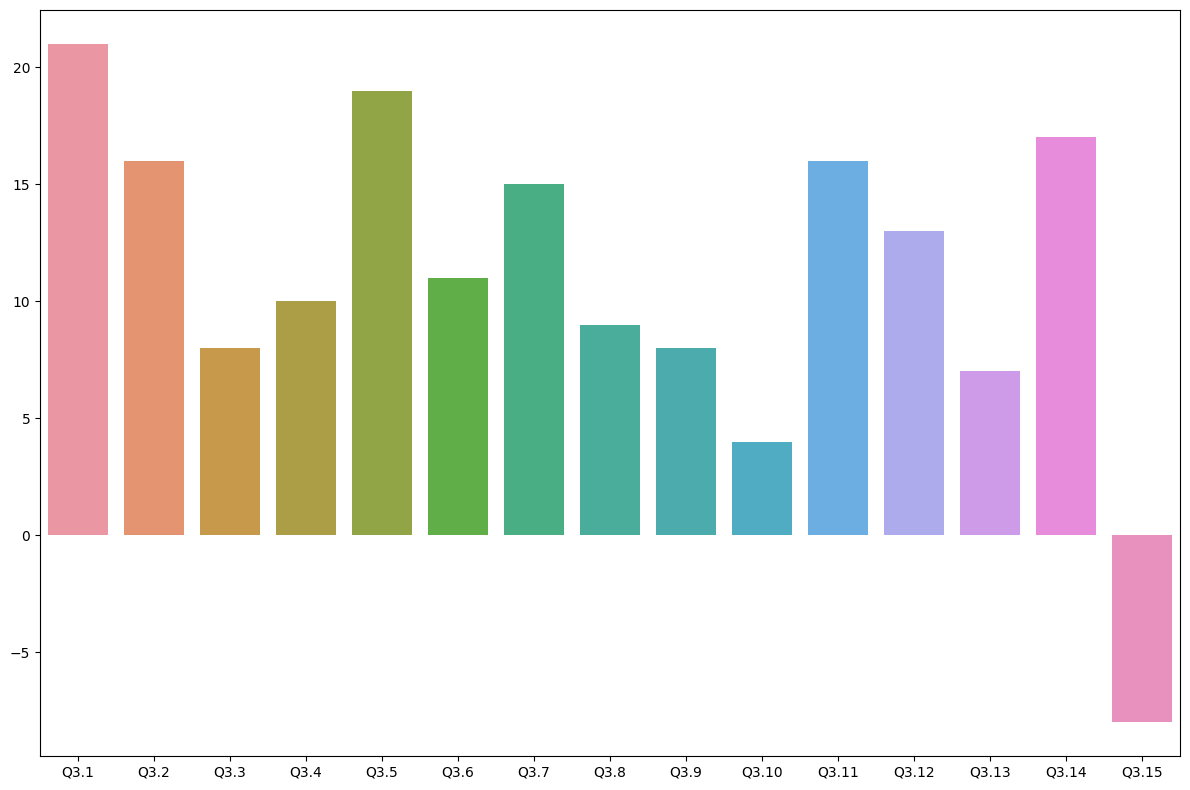

In [10]:
plt.figure(figsize = (12, 8))
sns.barplot(x = opinion_diff.index, y = opinion_diff.values, order = opinion_order)
plt.tight_layout()


- visualisations in change in attitude
- pca and cronbach's alpha 
- pca might not be able to do, but cronbach's alpha is good 

For Cronbach's Alpha, we will measure the alpha of the different groups according to the way they are supposed to be grouped together

We will do this in terms of before and after, and then the groups according to the document

In [12]:
import pingouin as pg

pre_course_alpha = pg.cronbach_alpha(data = pre_course_q3)
post_course_alpha = pg.cronbach_alpha(data=post_course_q3)
print(f"Cronbach's Alpha for pre-course (general): {pre_course_alpha[0]}")
print(f"Cronbach's Alpha for post-course (general): {post_course_alpha[0]}")

Cronbach's Alpha for pre-course (general): 0.7971766397407473
Cronbach's Alpha for post-course (general): 0.8507139143376153


In [13]:
lessons_attitude = ["Q3.1", "Q3.2", "Q3.3"]
lab_attitude = ["Q3.4", "Q3.5", "Q3.6"]
beliefs = ["Q3.7", "Q3.8", "Q3.9"]
tendencies = ["Q3.10", "Q3.11", "Q3.12"]
anxieties = ["Q3.13", "Q3.14", "Q3.15"]

tests = [lessons_attitude, lab_attitude, beliefs, tendencies, anxieties]
tests_texts = ["attitude in electrochemistry lessons", "attitude in electrochemistry labs", "beliefs in electrochemistry", "tendencies to learn electrochemistry", "anxieties about electrochemistry"]

for i in range(len(tests)):
    test = tests[i]
    test_text = tests_texts[i]
    pre_course_test = pre_course_q3[test]
    post_course_test = post_course_q3[test]

    pre_course_alpha = pg.cronbach_alpha(data = pre_course_test)
    post_course_alpha = pg.cronbach_alpha(data = post_course_test)

    print(f"Pre-course Cronbach's Alpha of {test_text}: {pre_course_alpha[0]}")
    print(f"Post-course Cronbach's Alpha of {test_text}: {post_course_alpha[0]}")
    print("\n")

Pre-course Cronbach's Alpha of attitude in electrochemistry lessons: 0.7794593648849621
Post-course Cronbach's Alpha of attitude in electrochemistry lessons: 0.8626802884615384


Pre-course Cronbach's Alpha of attitude in electrochemistry labs: 0.7697533071147662
Post-course Cronbach's Alpha of attitude in electrochemistry labs: 0.8310724496623881


Pre-course Cronbach's Alpha of beliefs in electrochemistry: 0.6817904993909865
Post-course Cronbach's Alpha of beliefs in electrochemistry: 0.5607202680067003


Pre-course Cronbach's Alpha of tendencies to learn electrochemistry: 0.658385093167702
Post-course Cronbach's Alpha of tendencies to learn electrochemistry: 0.8650525525525526


Pre-course Cronbach's Alpha of anxieties about electrochemistry: 0.20060936497755033
Post-course Cronbach's Alpha of anxieties about electrochemistry: -0.044441531200838824


